## Time Series on Oil Investments

In [1]:
# Load the Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the Data
df=pd.read_csv('Company Stock and Investment.csv')

In [3]:
# Preparing 3 indivuals  Time Series Models
# This is for Oil Investments
oil_Data=pd.DataFrame(df[['Date','Oil Investments']])

In [4]:
# Info of the Data
oil_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1984 non-null   object 
 1   Oil Investments  1984 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [5]:
#Check the Null values
oil_Data.isnull().sum()

Date               0
Oil Investments    0
dtype: int64

In [6]:
#Convert the Date 
oil_Data['Date'] = pd.to_datetime(oil_Data['Date'], dayfirst=True).dt.date

In [7]:
#Get the Year from the Date
oil_Data['myear'] =  pd.to_datetime(oil_Data['Date']).dt.year

In [8]:
#Analyis the Last 3 years data 
oil_Data=oil_Data[oil_Data['myear']>2014]

In [9]:
#Get the Month Year from the Date
oil_Data['month_year'] =  pd.to_datetime(oil_Data['Date']).dt.to_period('M')

In [10]:
#Get the unique Month Year from the Date
oil_Data['month_year'].unique()

<PeriodArray>
['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07',
 '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02',
 '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
 '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
 '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11']
Length: 35, dtype: period[M]

In [11]:
#Drop the myear column
oil_Data.drop('myear',axis=1,inplace=True)
# Date

In [12]:
#Drop the Date column
oil_Data.drop('Date',axis=1,inplace=True)

In [13]:
# aggerate (group by ) the OilInvestments by Year,Month
oil_invest=oil_Data.groupby(oil_Data['month_year'], as_index=False).agg({"Oil Investments": "sum"})
# data.groupby('month', as_index=False).agg({"duration": "sum"})

In [14]:
oil_invest.head()

,month_year,Oil Investments
0,2015-01,-0.098633
1,2015-02,0.058466
2,2015-03,-0.034961
3,2015-04,0.232005
4,2015-05,0.014693


In [15]:
# oilData=oil_invest

In [16]:
oil_invest['month_year']=oil_invest['month_year'].astype('period[D]')

# pd.Period(oil_invest['month_year'], freq='D')

In [17]:
oil_invest['month_year']=oil_invest['month_year'].dt.strftime('%Y-%m-%d')

In [18]:
oil_invest.describe()

,Oil Investments
count,35.000000
mean,-0.019737
std,0.178553
min,-0.890783
25%,-0.059882
50%,-0.009842
75%,0.060970
max,0.232255


In [19]:

# IQR score technique to remove Outliers 
Q1 = oil_invest.quantile(0.25)
Q3 = oil_invest.quantile(0.75)
IQR = Q3 - Q1
print(oil_invest.shape)
dfIQR = oil_invest[~((oil_invest < (Q1-1.5 * IQR)) |(oil_invest > (Q3 + 1.5 * IQR))).any(axis=1)]
dfIQR.shape

# Nearly 100 rows detected as outliers

(35, 2)


(34, 2)

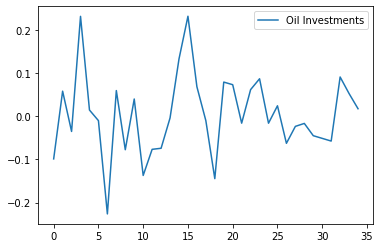

In [20]:
dfIQR.plot()

## check if data is stationary or not.

In [21]:

#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [22]:
adfuller_test(dfIQR['Oil Investments'])

ADF Test Statistic : -5.22861862808383
p-value : 7.683187877137297e-06
#Lags Used : 0
Number of Observations Used : 33
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [23]:
oilData=dfIQR

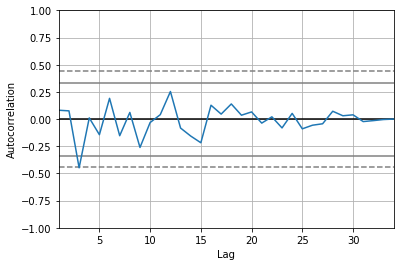

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(oilData['Oil Investments'])
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [26]:
oilData.set_index('month_year',inplace=True)

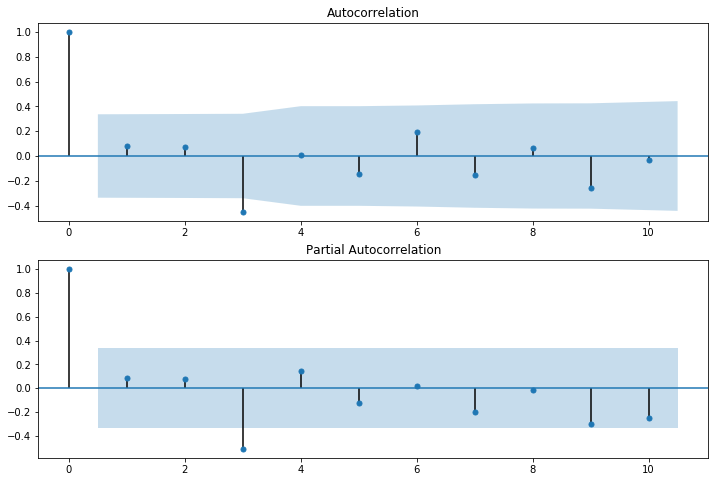

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(oilData['Oil Investments'],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(oilData['Oil Investments'],lags=10,ax=ax2)

In [28]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# Usually in seasonal data we avoid arima ,just showing u how to impliment
from statsmodels.tsa.arima_model import ARIMA

In [29]:
model=ARIMA(oilData['Oil Investments'],order=(1,1,0)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: Futu

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Oil Investments   No. Observations:                   33
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  25.260
Method:                       css-mle   S.D. of innovations              0.112
Date:                Fri, 23 Oct 2020   AIC                            -44.520
Time:                        00:39:24   BIC                            -40.030
Sample:                             1   HQIC                           -43.009
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0024      0.013      0.178      0.859      -0.024       0.028
ar.L1.D.Oil Investments    -0.4860      0.152     -3.204      0.001      -0.783      -0.189
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.0576           +0.0000j            2.0576            0.5000
-----------------------------------------------------------------------------
"""

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


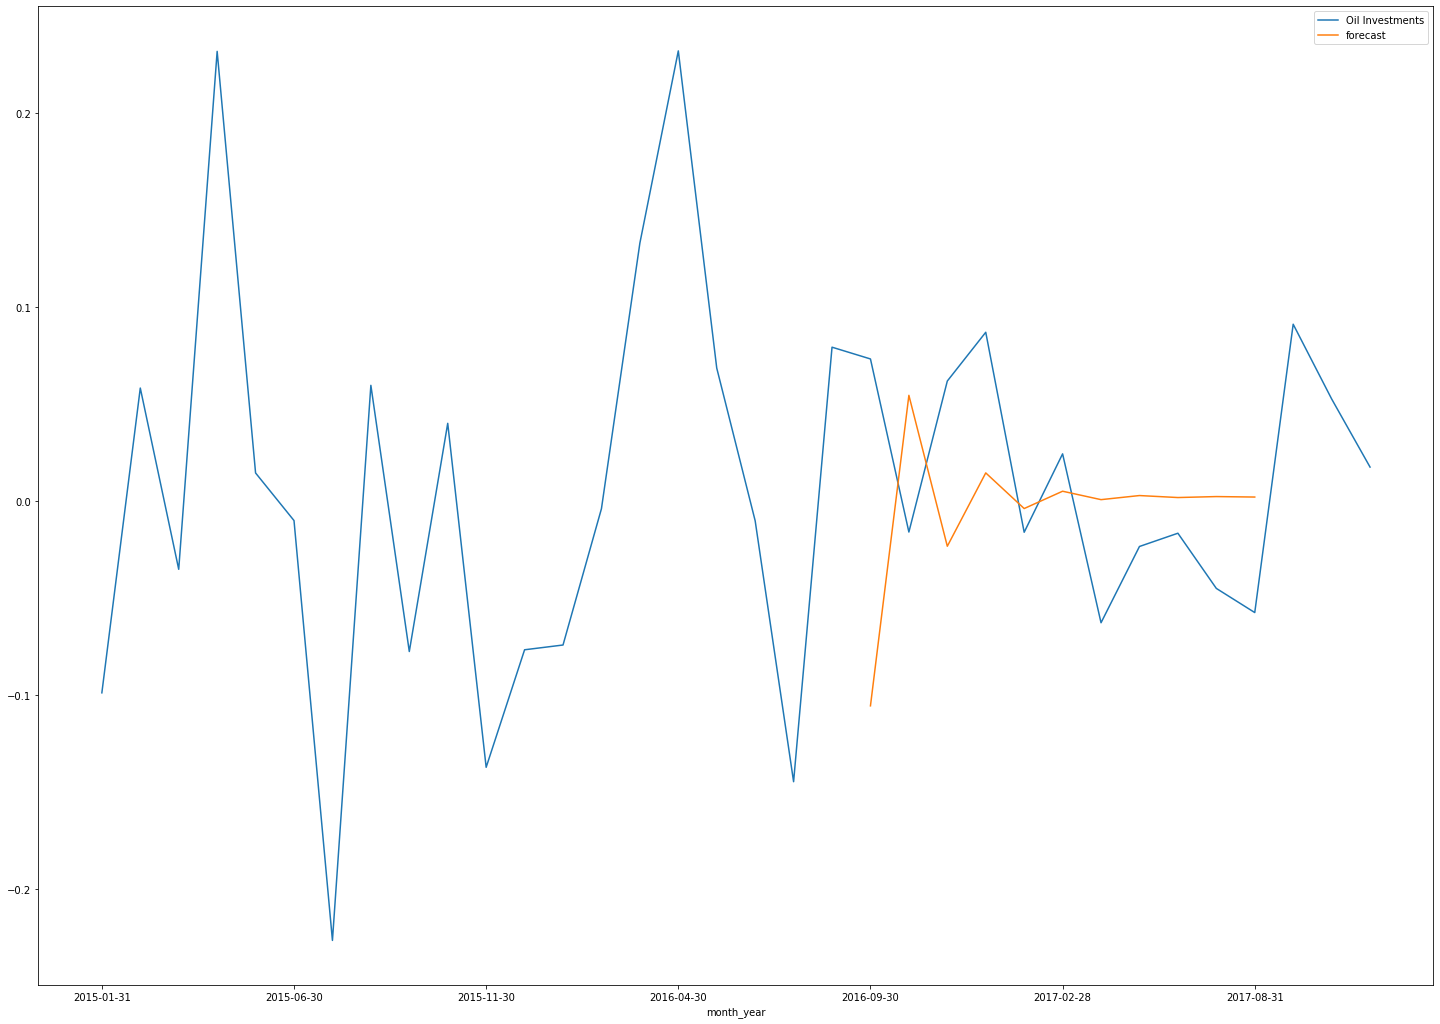

In [31]:
oilData['forecast']=model_fit.predict(start=20,end=30,dynamic=True)
oilData[['Oil Investments','forecast']].plot(figsize=(25,18))

In [34]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax (i.e, Every 3 months)

In [120]:
# (i.e, Every 3 months) seasonal_order
model=sm.tsa.statespace.SARIMAX(oilData['Oil Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,3)) #(p,d,q,Shift)
results=model.fit()

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWar

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


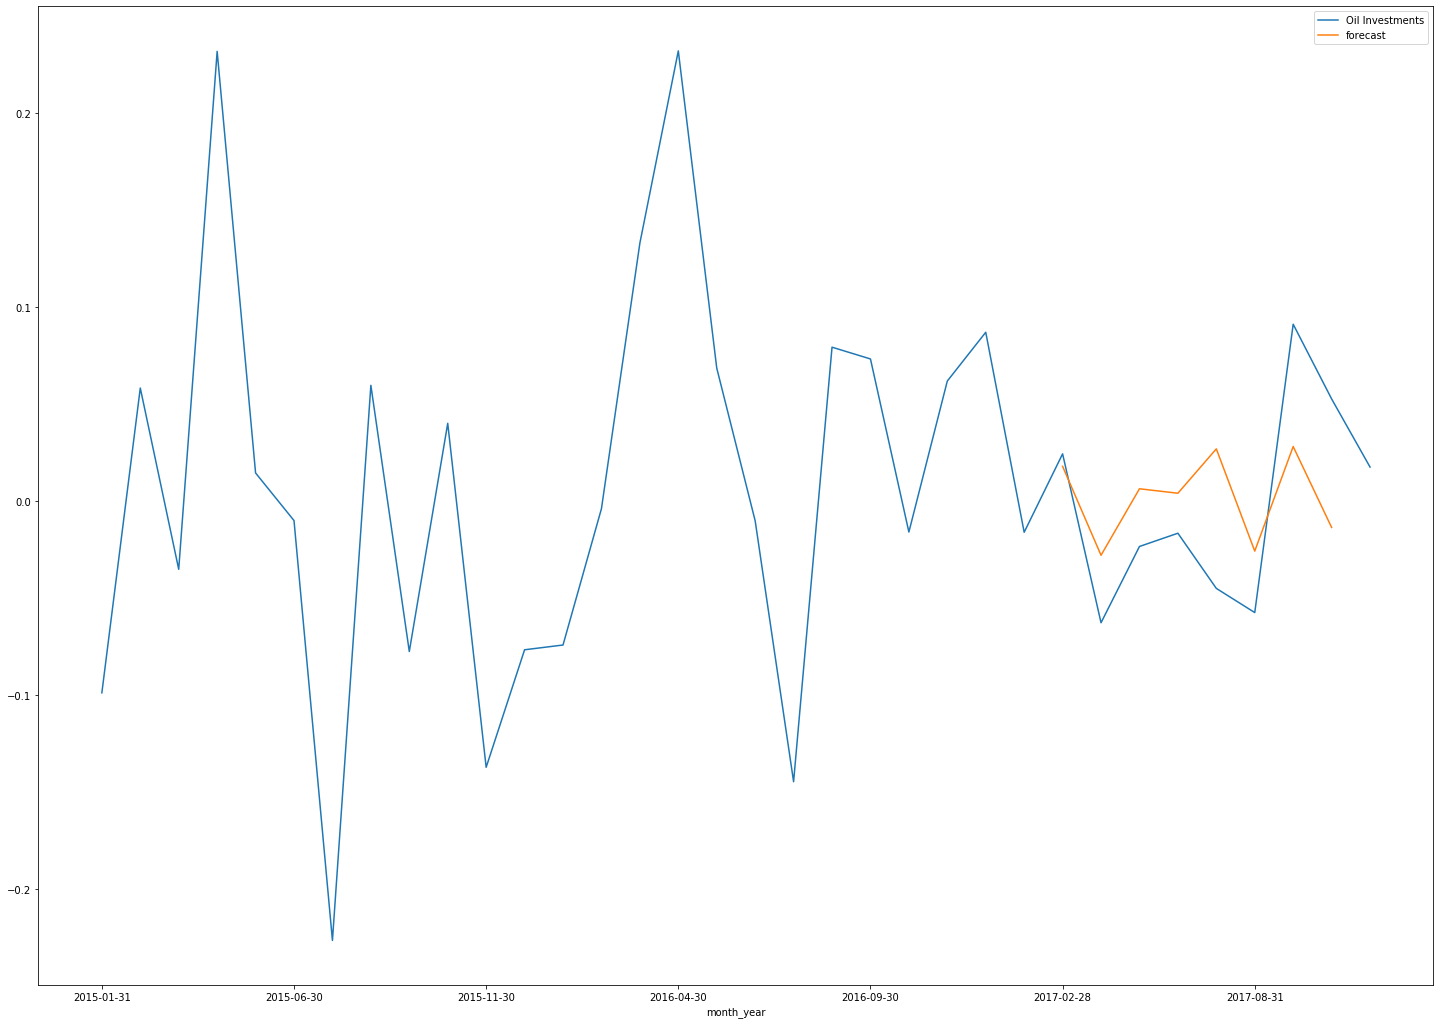

In [121]:
oilData['forecast']=results.predict(start=25,end=32,dynamic=True)
oilData[['Oil Investments','forecast']].plot(figsize=(25,18))

## Preparing the TestData

In [122]:
# Preparing the TestData
from pandas.tseries.offsets import DateOffset
future_dates=[pd.to_datetime(oilData.index[-1]).date()+DateOffset(months=x) for x in range(0,24)]


In [123]:
future_dates[0].date()

datetime.date(2017, 11, 30)

In [124]:
future_dateset_df=pd.DataFrame(index=future_dates[1:],columns=oilData.columns)

In [125]:
future_dateset_df

,Oil Investments,forecast
2017-12-30,NaN,NaN
2018-01-30,NaN,NaN
2018-02-28,NaN,NaN
2018-03-30,NaN,NaN
2018-04-30,NaN,NaN
2018-05-30,NaN,NaN
2018-06-30,NaN,NaN
2018-07-30,NaN,NaN
2018-08-30,NaN,NaN
2018-09-30,NaN,NaN


In [126]:
#Combine the Data
future_df=pd.concat([oilData,future_dateset_df])

In [130]:
future_df.reset_index(inplace=True)

In [134]:
future_df['index']=pd.to_datetime(future_df['index']).dt.date

In [135]:
future_df.set_index('index',inplace=True)

In [139]:
future_df.shape

(57, 2)

In [157]:
model=sm.tsa.statespace.SARIMAX(future_df['Oil Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,3)) #(p,d,q,Shift)
M_results=model.fit()

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


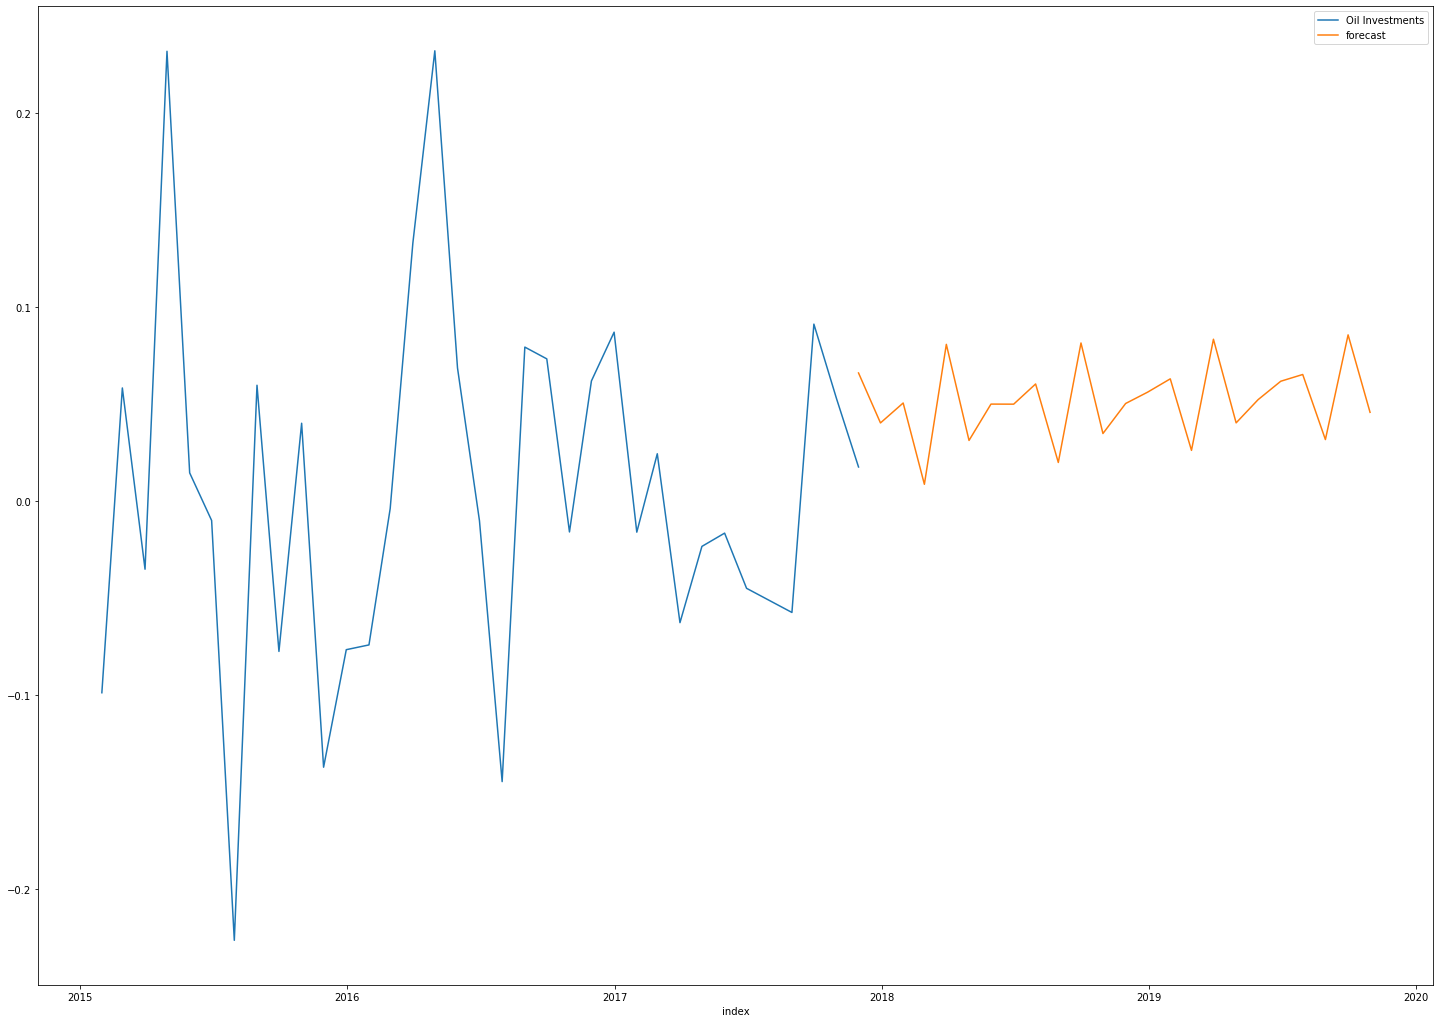

In [159]:
future_df['forecast']=M_results.predict(start=33,end=56,dynamic=True)
future_df[['Oil Investments','forecast']].plot(figsize=(25,18))